# EDA
---

### 1. Problema de Negocio:
+  Se necesita desarrollar un sistema de recomendacion, que puede tener diverssas finalidades. Como Data Scientist mi rol es determinal cual es la manera mas efectiva y eficiente de entregar un mvp, de acuerdo a la problematica. Primero es necesario determinar que datos son los mas apropiados para el modelo de recomendacion.
#### **`¿Que lista de peliculas son las mas recomendables a partir de una pelicula?`**

### 2. El set de datos despues de la limpieza
+  La informacion disponible se encuentra en un archivo csv(Dataset_For_Eda) con 45451 filas y 23 columnas.
+  Cada registro tiene 23 caracteristicas:

    1. **`"belongs_to_collection"`**:Un diccionario que indica a que franquicia o serie de películas pertenece la película.
    2. **`"budget"`**:El presupuesto de la película, en dólares(int)
    3. **`"genres"`**:Un diccionario que indica todos los géneros asociados a la película.(Dict)
    4. **`"id"`**: ID de la pelicula.(Int)
    5. **`"original_language"`**: Idioma original en la que se grabo la pelicula.(Object)
    6. **`"overview"`**: Pequeño resumen de la película.(Object)
    7. **`"populrity"`**: Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase).(Float)
    8. **`"production_companies"`**: Lista con las compañias productoras asociadas a la película.(list)
    9. **`"production_countries"`**: Lista con los países donde se produjo la película.(list)
    10. **`"release_date"`**: Fecha de estreno de la película.(Object)
    11. **`"revenue"`**:Recaudación de la pelicula, en dolares.(Float)
    12. **`"runtime"`**: Duración de la película, en minutos.(Float)
    13. **`"spoken_languages"`**: Lista con los idiomas que se hablan en la pelicula.(Object)
    14. **`"status"`**: Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc).(Object)
    15. **`"tagline"`**: Frase celebre asociada la pelicula.(Object)
    16. **`"title"`**: Titulo de la pelicula.(Object)
    17. **`"vote_average"`**: Puntaje promedio de reseñas de la pelicula.(Float)
    18. **`"vote_count"`**: Numeros de votos recibidos por la pelicula, en TMDB.(Int)
    19. **`"name_genre"`**: lista filtrada de los Generos relacionados con la pelicula.(Object)
    20. **`"Collections"`**: Nombre de la coleccion a la que pertenece.(Object)
    21. **`"release_year"`**: Año de estreno(Object)
    22. **`"return"`**: Roi, retorno de inversion de la pelicula.(Int)
    23. **`"director"`**: Director de la pelicula.(Object)

### 3. Lectura del Dataset:
+ ##### 3.1 Heatmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
Eda_dataset=pd.read_csv('Dataset/Dataset_For_Eda.csv')

In [3]:
Eda_dataset

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,name_genre,Collections,release_year,return,director
0,['Toy Story Collection'],30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,Released,NaN,Toy Story,7.7,5415.0,"Animation,Comedy,Family",['Toy Story Collection'],1995,12.451801,John Lasseter
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"Adventure,Fantasy,Family",NaN,1995,4.043035,Joe Johnston
2,['Grumpy Old Men Collection'],0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"Romance,Comedy",['Grumpy Old Men Collection'],1995,NaN,Howard Deutch
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"Comedy,Drama,Romance",NaN,1995,5.090760,Forest Whitaker
4,['Father of the Bride Collection'],0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Comedy,['Father of the Bride Collection'],1995,inf,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,...,Released,NaN,Robin Hood,5.7,26.0,"Drama,Action,Romance",NaN,1991,NaN,John Irvin
45447,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,['Sine Olivia'],"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,...,Released,NaN,Century of Birthing,9.0,3.0,Drama,NaN,2011,NaN,Lav Diaz
45448,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,['American World Pictures'],"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,...,Released,A deadly game of wits.,Betrayal,3.8,6.0,"Action,Drama,Thriller",NaN,2003,NaN,Mark L. Lester
45449,NaN,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,...,Released,NaN,Satan Triumphant,0.0,0.0,NaN,NaN,1917,NaN,Yakov Protazanov


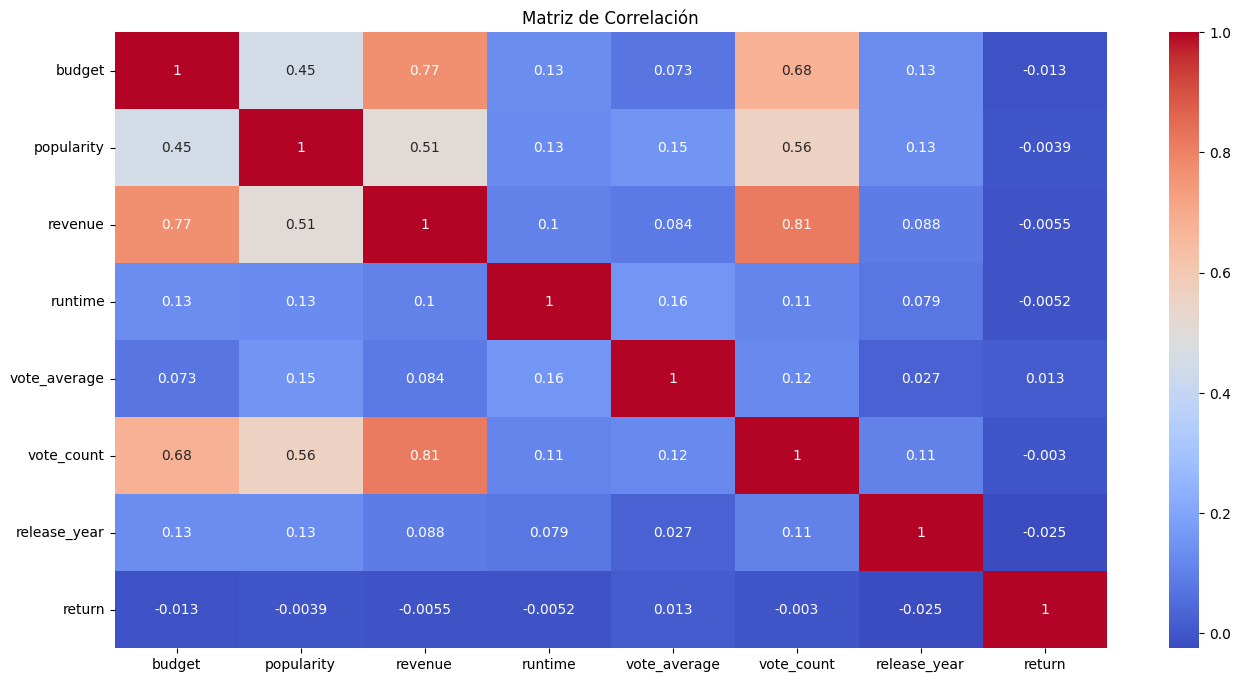

In [4]:
# Crear una copia del DataFrame sin la columna 'id'
Eda_dataset_tmp = Eda_dataset.drop('id', axis=1)

# Seleccionar las columnas numéricas del DataFrame temporal
data_num = Eda_dataset_tmp.select_dtypes(exclude=['object'])

# Calcular la matriz de correlación
correlation_matrix = data_num.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


##### A simple vista, ciertos campos no aportan ninguna informacion para predecir la lista o por lo menos no tan significativamente, dado que se requiere un MVP(Minimal Viable proyect). las Columnas son: budget, belongs_to_collection, orifinal_language, release_date, status, tagline, Collections, release_year,return, director,overview,revenue,runtime,spoken_languagues,genres.
+ #### Se eliminaron por:
    1. **`"belongs_to_collection"`**: el 85% de la columna son nulos y no es tan significativa la informacion que aporta para el modelo.
    2. **`"original_language"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    3. **`"release_date"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    4. **`"status"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    5. **`"tagline"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    6. **`"Collections"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    7. **`"release_year"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    8. **`"return"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    9. **`"director"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    10. **`"overview"`**: Aportaria mucha informacion, pero es un dato un variable, y se va del alcance para el MVP.
    11. **`"revenue"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    12. **`"runtime"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    13. **`"spoken_languages"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    14. **`"genres"`**: Se creo una columna con una mejor estructura y con la misma informacion.

In [5]:
Eda_dataset.drop(['belongs_to_collection', 'original_language', 'release_date', 'status', 'tagline', 'Collections', 'release_year', 'return', 'director', 'overview', 'revenue', 'runtime', 'spoken_languages', 'genres'], axis=1, inplace=True)

In [6]:
Eda_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45451 non-null  float64
 1   id                    45451 non-null  int64  
 2   popularity            45451 non-null  float64
 3   production_companies  45451 non-null  object 
 4   production_countries  45451 non-null  object 
 5   title                 45451 non-null  object 
 6   vote_average          45451 non-null  float64
 7   vote_count            45451 non-null  float64
 8   name_genre            43067 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [7]:
Eda_dataset.describe()

,budget,id,popularity,vote_average,vote_count
count,4.545100e+04,45451.000000,45451.000000,45451.000000,45451.000000
mean,4.231294e+06,107984.599745,2.926887,5.624085,109.989703
std,1.742942e+07,112111.336735,6.006458,1.915424,491.352336
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,26367.500000,0.389095,5.000000,3.000000
50%,0.000000e+00,59871.000000,1.131386,6.000000,10.000000
75%,0.000000e+00,156327.500000,3.694370,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,10.000000,14075.000000


### 4. Analisis Exploratorio
##### La idea es utilizar herramientas estadisticas y de visualizacion para:
+ Crear un mapa mental del set de datos (entenderlo)
+ Empezar a encontrar respuestas a la pregunta planteada inicialmente (**`"¿Que lista de peliculas son las mas recomendables a partir de una pelicula?"`**)

Llevare a cabo estas fases:
1. Analisis de cada variable de Manera **`individual`**.
2. Analisis univariado: relacion de cada  **`variable predictora`** con la variable **`target`**.
3. Analisis bivariado: relacion de **`pares`** de **`variables predictoras`** con la variable target.

### 4.1 Analisis de cada variable de manera individual

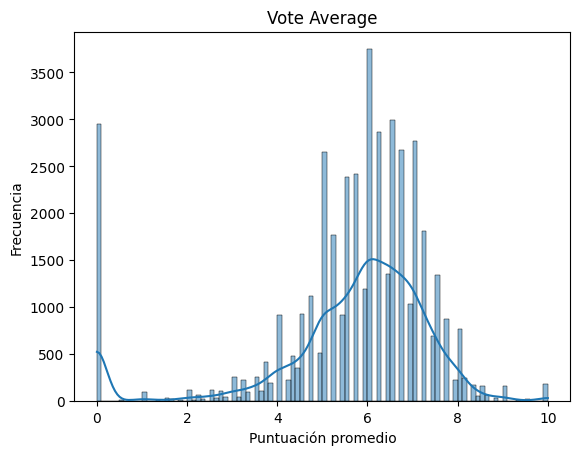

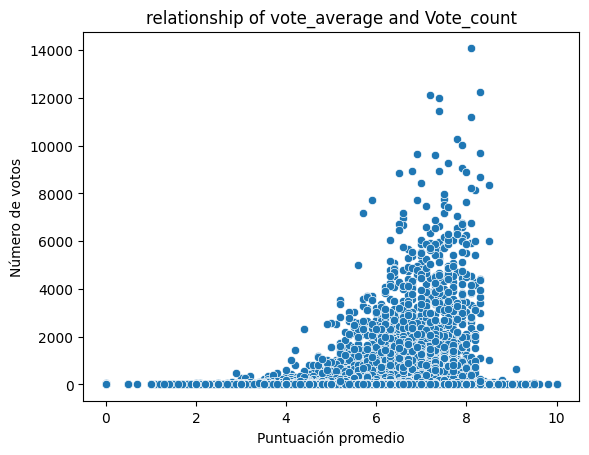

In [8]:
# Histograma de una variable numérica
sns.histplot(Eda_dataset['vote_average'], kde=True)
plt.xlabel('Puntuación promedio')
plt.ylabel('Frecuencia')
plt.title('Vote Average')
plt.show()
# Diagrama de dispersión de dos variables numéricas
sns.scatterplot(x='vote_average', y='vote_count', data=Eda_dataset)
plt.xlabel('Puntuación promedio')
plt.ylabel('Número de votos')
plt.title('relationship of vote_average and Vote_count')
plt.show()

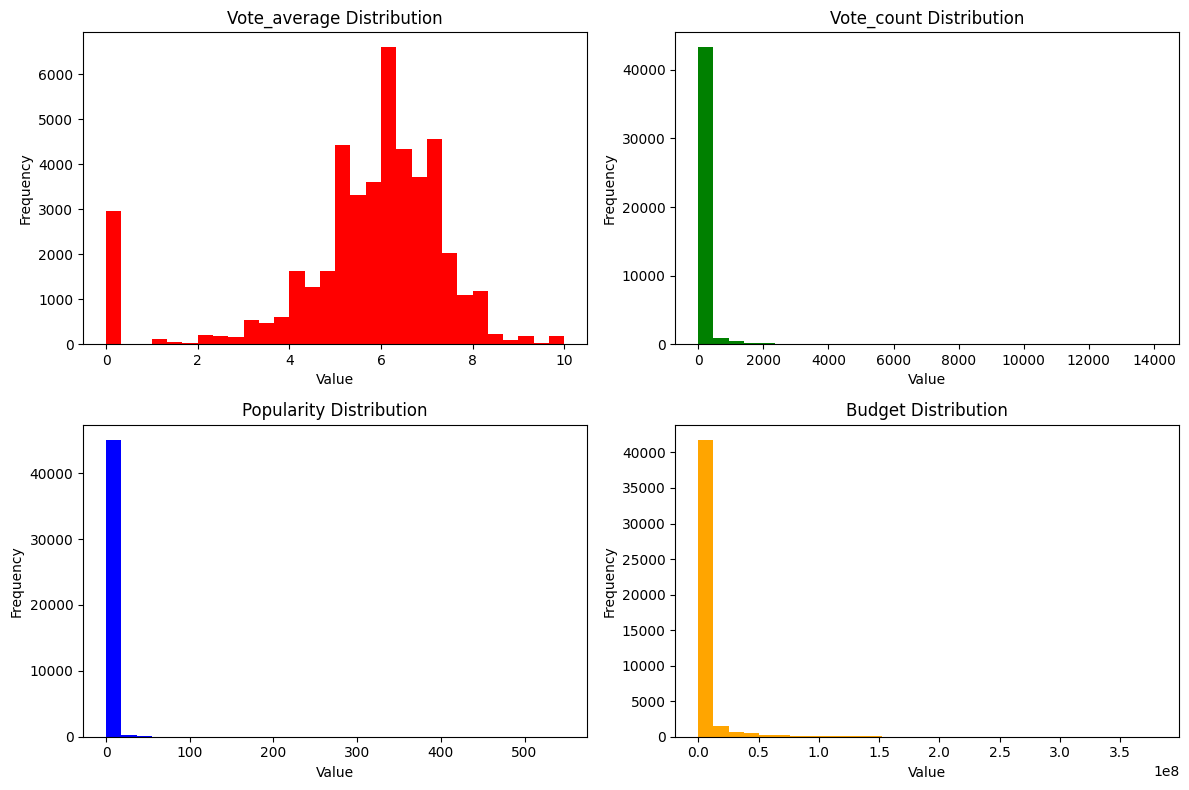

In [9]:
# Obtener los datos necesarios para los gráficos
data = Eda_dataset[['vote_average', 'vote_count', 'popularity', 'budget']]

# Crear los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Definir colores distintos para cada gráfico
colors = ['red', 'green', 'blue', 'orange']

# Generar los gráficos de cada columna en los subplots
for i, column in enumerate(data.columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.hist(data[column], bins=30, color=colors[i])
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


iso_3166_1 US name United States of America                                      17868
iso_3166_1 GB name United Kingdom                                                 2238
iso_3166_1 FR name France                                                         1656
iso_3166_1 JP name Japan                                                          1360
iso_3166_1 IT name Italy                                                          1029
iso_3166_1 CA name Canada                                                          841
iso_3166_1 DE name Germany                                                         752
iso_3166_1 IN name India                                                           735
iso_3166_1 RU name Russia                                                          734
iso_3166_1 GB name United Kingdom iso_3166_1 US name United States of America      569
dtype: int64


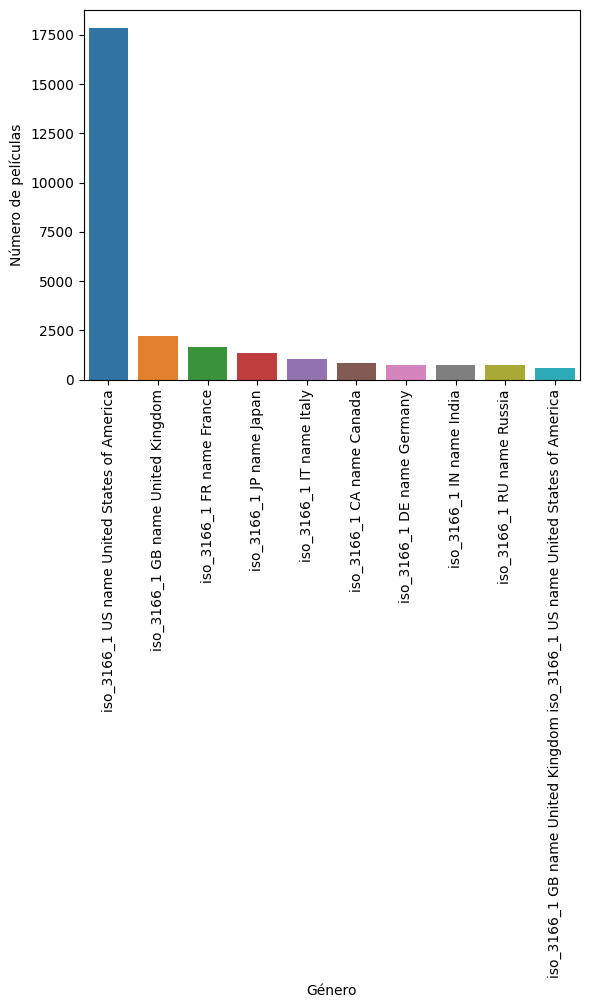

In [17]:
import re

# Limpiar los valores de la columna 'production_countries'
Eda_dataset['production_countries'] = Eda_dataset['production_countries'].apply(lambda x: re.sub(r"[^\w\s]+", "", x))
Eda_dataset['production_countries'] = Eda_dataset['production_countries'].apply(lambda x: re.sub(r"[\[\]']", "", x))

# Obtener las características de género
genre_counts = Eda_dataset['production_countries'].str.get_dummies(',').sum()
genre_counts.sort_values(ascending=False, inplace=True)
print(genre_counts.head(10))


sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values)
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=90)
plt.show()



iso_3166_1 US name United States of America                                      17868
iso_3166_1 GB name United Kingdom                                                 2238
iso_3166_1 FR name France                                                         1656
iso_3166_1 JP name Japan                                                          1360
iso_3166_1 IT name Italy                                                          1029
iso_3166_1 CA name Canada                                                          841
iso_3166_1 DE name Germany                                                         752
iso_3166_1 IN name India                                                           735
iso_3166_1 RU name Russia                                                          734
iso_3166_1 GB name United Kingdom iso_3166_1 US name United States of America      569
dtype: int64


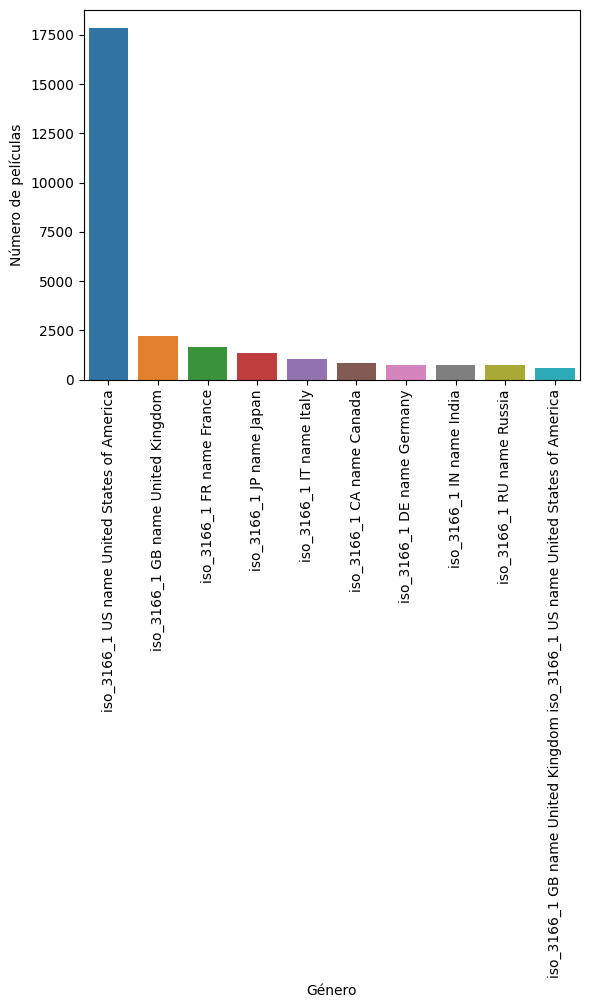

In [18]:
# Limpiar los valores de la columna 'production_countries'
Eda_dataset['production_companies'] = Eda_dataset['production_companies'].apply(lambda x: re.sub(r"[^\w\s]+", "", x))
Eda_dataset['production_companies'] = Eda_dataset['production_companies'].apply(lambda x: re.sub(r"[\[\]']", "", x))

# Obtener las características de género
genre_counts = Eda_dataset['production_countries'].str.get_dummies(',').sum()
genre_counts.sort_values(ascending=False, inplace=True)
print(genre_counts.head(10))


sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values)
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=90)
plt.show()


### 5.1 Analisis bivariado

/tmp/ipykernel_18391/1904812677.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = pd.cut(data['popularity'], bins=ranges, labels=colors)


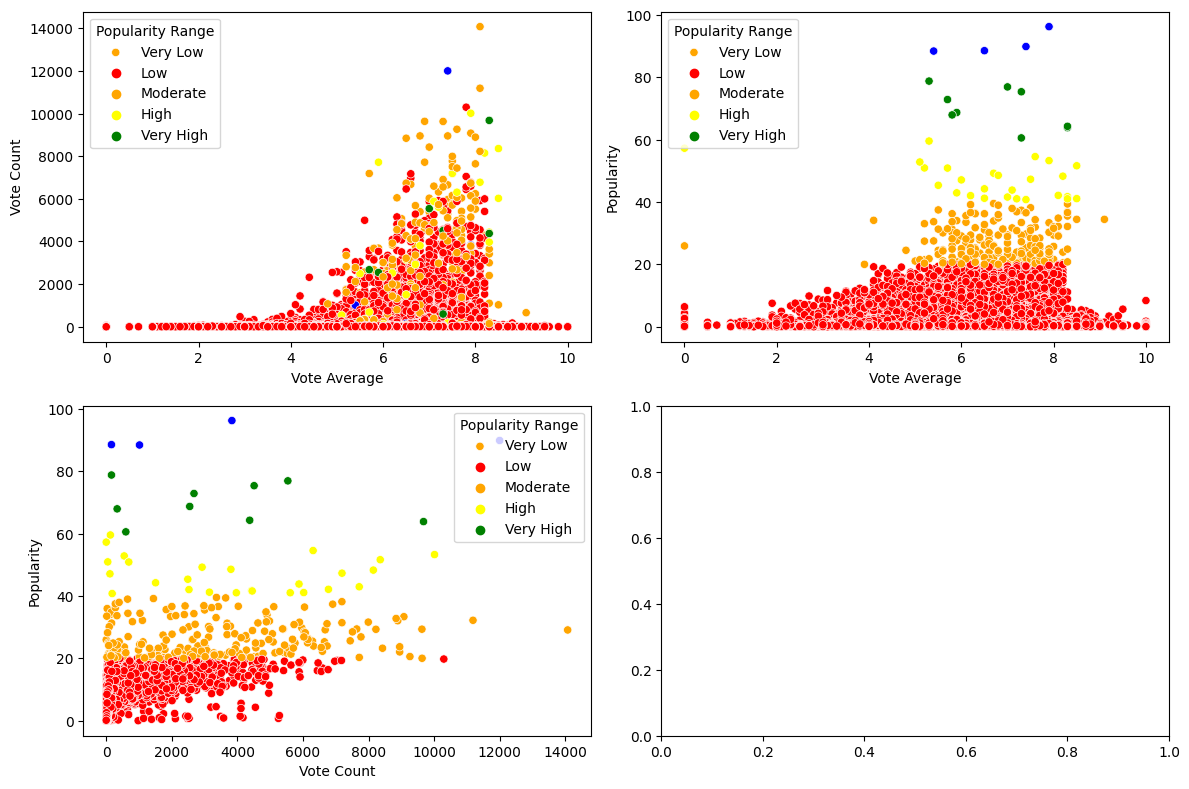

In [10]:
# Obtener los datos necesarios para los pair plots
data = Eda_dataset[['vote_average', 'vote_count', 'popularity']]

# Definir los rangos y los colores correspondientes
ranges = [0, 20, 40, 60, 80, 100]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
data['color'] = pd.cut(data['popularity'], bins=ranges, labels=colors)

# Crear los pair plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Generar los pair plots en los subplots
scatter = sns.scatterplot(data=data, x='vote_average', y='vote_count', hue='color', ax=axs[0, 0], palette=colors)
axs[0, 0].set_xlabel('Vote Average')
axs[0, 0].set_ylabel('Vote Count')
scatter.legend(title='Popularity Range', labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

scatter = sns.scatterplot(data=data, x='vote_average', y='popularity', hue='color', ax=axs[0, 1], palette=colors)
axs[0, 1].set_xlabel('Vote Average')
axs[0, 1].set_ylabel('Popularity')
scatter.legend(title='Popularity Range', labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

scatter = sns.scatterplot(data=data, x='vote_count', y='popularity', hue='color', ax=axs[1, 0], palette=colors)
axs[1, 0].set_xlabel('Vote Count')
axs[1, 0].set_ylabel('Popularity')
scatter.legend(title='Popularity Range', labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los pair plots
plt.show()

##### El gráfico de dispersión muestra la relación entre 'vote_average', 'vote_count' y 'popularity'de películas. Los colores representan la popularidad. Ayuda a identificar si las películas más populares tienen calificaciones más altas y cómo se relacionan la cantidad de votos y la popularidad.

In [ ]:
# Definir la función de limpieza y tokenización
def limpiar_tokenizar(texto):
    # Eliminar caracteres no alfanuméricos y convertir a minúsculas
    texto_limpio = re.sub(r"[^\w\s]", "", texto.lower())
    # Tokenizar el texto
    tokens = texto_limpio.split()
    # Eliminar las stopwords
    stop_words = set(stopwords.words('english'))
    tokens_filtrados = [token for token in tokens if token not in stop_words]
    # Unir los tokens en una cadena
    texto_tokenizado = ' '.join(tokens_filtrados)
    return texto_tokenizado

In [ ]:
# Aplicar la función de limpieza y tokenización a cada título
df_title = Eda_dataset
df_title['title_tokenizado'] = df_title['title'].apply(limpiar_tokenizar)
df_title[['title', 'title_tokenizado']].head()

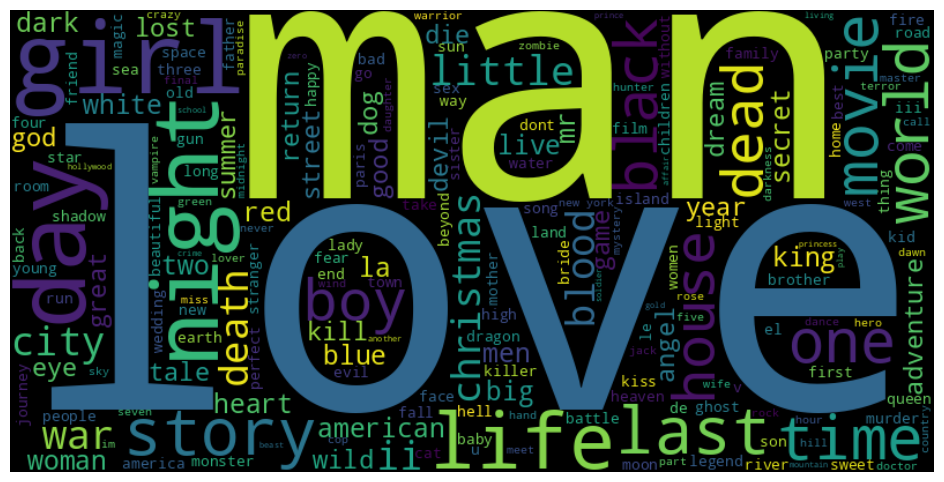

In [19]:
# Generar la nube de palabras
all_tokens = ' '.join(df_title['title_tokenizado'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tokens)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Conclusiones:



+ **`title`**: Para buscar la película de interés y obtener su información.

v **`name_genre`**: Para obtener las características de género de la película de interés y de todas las demás películas.

+ **`vote_average`** y vote_count: Para obtener las puntuaciones de las películas y combinarlas con las características de género.

La función utiliza un modelo de Machine Learning basado en similitud de coseno para realizar las recomendaciones de películas similares. A continuación, se explica por qué se elige este modelo:

+ La similitud de coseno es una medida comúnmente utilizada para calcular la similitud entre dos vectores en un espacio multidimensional. En este caso, se utiliza para calcular la similitud entre las características de género y las puntuaciones de las películas.
Al combinar las características de género y las puntuaciones, se crea una matriz de características que representa cada película.
El cálculo de similitud de coseno compara la película de interés con todas las demás películas en función de sus características, y devuelve una puntuación de similitud para cada par de películas.
Los índices de las películas más similares se obtienen ordenando las puntuaciones de similitud en orden descendente y seleccionando los índices correspondientes a las películas más similares.
Finalmente, se devuelve una lista de los títulos de las 5 películas más similares como recomendaciones.
El modelo de similitud de coseno es elegido en este caso porque es adecuado para calcular la similitud entre películas basándose en sus características de género y puntuaciones. Al utilizar este enfoque, se pueden obtener recomendaciones relevantes que tienen características similares a la película de interés en términos de género y calificaciones.
